# Datenanalyse zur Kommunalwahl 2020 in Düsseldorf
## Rats Kandidateninnen und Kandidaten

In [5]:
# Load Modules and general Settings

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

#pd.set_option('display.max_rows', 600)

## Daten einlesen

Grundlage der Datenanalysen bilden die von der Landeshauptstadt Düsseldorf über deren Open Data Portal bereitgestellten Daten.

https://opendata.duesseldorf.de/dataset/ratswahl-2020-d%C3%BCsseldorf

In [6]:
df = pd.read_csv("./Daten/Rats_Kandidatinnen_und_Kandidaten _0.csv", delimiter=";")

In [ ]:
# Show Data
df

In [8]:
# Show summary of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 703 entries, 0 to 702
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Partei              703 non-null    object 
 1   Partei kurz         657 non-null    object 
 2   Wahlbezirk          556 non-null    float64
 3   Name                703 non-null    object 
 4   Namensvorsatz       2 non-null      object 
 5   Vorname             703 non-null    object 
 6   Akadgrad            30 non-null     object 
 7   Jahrgang            703 non-null    int64  
 8   Geburtsort          703 non-null    object 
 9   Beruf               703 non-null    object 
 10  PLZ                 703 non-null    int64  
 11  Wohnort             703 non-null    object 
 12  Reserveliste_Platz  703 non-null    int64  
 13  E-Mail              703 non-null    object 
dtypes: float64(1), int64(3), object(10)
memory usage: 49.5+ KB


In [9]:
# Anzahl Parteien
df['Partei'].nunique()

16

## Partei Abkürzung
Erweiterung um eine neue Spalte mit der Partei Abkürzung, sofern vorhanden. Alternativ wird der volle Parteiname verwendet.

In [10]:
df['Partei_kurz'] = df.apply(lambda x: x['Partei'] if pd.isnull(x['Partei kurz']) else x['Partei kurz'], axis=1)

## Überblick der Verteilung der KandidatInnen

In [192]:
# Number of entries per party

data = df['Partei'].value_counts()
# df['Partei'].value_counts().head(7)
df['Partei'].value_counts()


Sozialdemokratische Partei Deutschlands                                                          106
Christlich Demokratische Union Deutschlands                                                       77
BÜNDNIS 90/DIE GRÜNEN                                                                             63
Freie Demokratische Partei                                                                        50
Unabhängige Wählergemeinschaft für Düsseldorf                                                     45
DIE LINKE                                                                                         44
Volt Deutschland                                                                                  41
DIE REPUBLIKANER                                                                                  41
Klimaliste Düsseldorf                                                                             41
Aktion Partei für Tierschutz                                                               

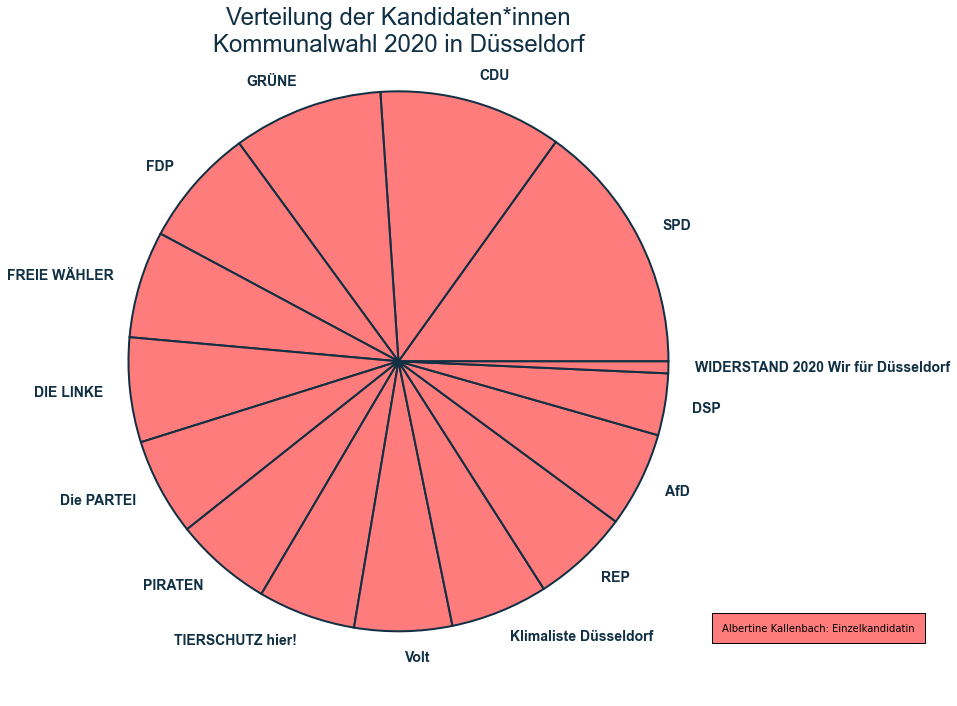

In [203]:
fig, ax = plt.subplots(figsize=(20, 10))

legend = df['Partei_kurz'].value_counts().keys()[:-1]

title = {'family': 'Arial',
        'color':  '#113044',
        'weight': 'normal',
        'size': 24,
        }

label_text = {'family': 'Arial',
        'color':  '#113044',
        'weight': 'bold',
        'size': 14,
        }

#colors = ['#FF5C5C','#113044','#3D96CC']
colors = ['#FF5C5CCC']

wedges, autotexts = ax.pie(data[:-1], colors=colors, labels=legend, wedgeprops={"edgecolor":"#113044",'linewidth': 2, 'linestyle': 'solid'}, textprops=label_text)

ax.set_title("Verteilung der Kandidaten*innen\nKommunalwahl 2020 in Düsseldorf", fontdict=title, y=0.95)

ax.text(1.2, -1, 'Albertine Kallenbach: Einzelkandidatin', style='normal',
        bbox={'facecolor': '#FF5C5CCC', 'pad': 10})

plt.tight_layout()
plt.show()

In [166]:
# Only Head and others

partei_counts_df = df['Partei_kurz'].value_counts()
top_df = partei_counts_df.head()
top_df.loc['Sonstige'] = partei_counts_df[5:].sum()
top_df

SPD             106
CDU              77
GRÜNE            63
FDP              50
FREIE WÄHLER     45
Sonstige        362
Name: Partei_kurz, dtype: int64

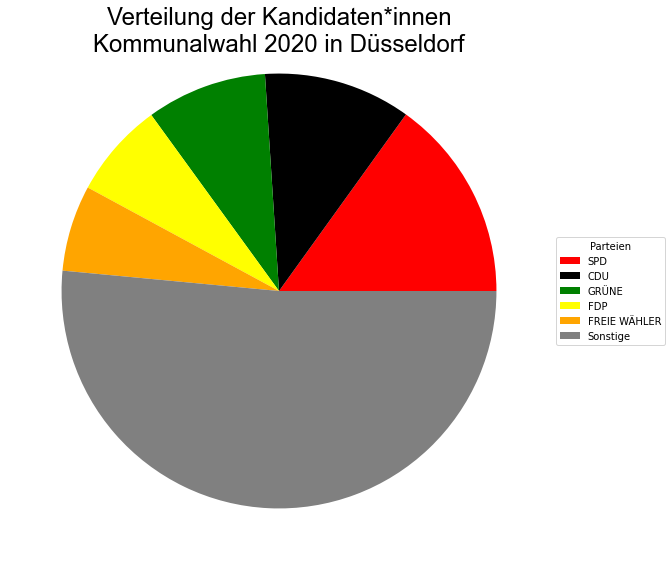

In [187]:
# Only Head and others

fig, ax = plt.subplots(figsize=(20, 10))

legend = top_df.keys()


title = {'family': 'Arial',
        'color':  'black',
        'weight': 'normal',
        'size': 24,
        }

colors = ['red', 'black', 'green', 'yellow','orange','gray']

wedges, autotexts = ax.pie(top_df, colors=colors)

ax.legend(wedges, legend,
          title="Parteien",
          loc="center left",
          bbox_to_anchor=(1, 0, 0, 1))
    
ax.set_title("Verteilung der Kandidaten*innen\nKommunalwahl 2020 in Düsseldorf", fontdict=title, y=0.93)


plt.show()

### Namen

In [13]:
df['Name'].value_counts()

Müller         6
Krüger         6
Schmidt        5
Becker         5
Möller         5
              ..
Bursian        1
Suchantke      1
Panhaus        1
Siegesmund     1
Schönberger    1
Name: Name, Length: 614, dtype: int64

In [14]:
df['Vorname'].value_counts().head()

Oliver     10
Markus      9
Andreas     8
Thomas      7
Jürgen      7
Name: Vorname, dtype: int64

### Akademischer Grad

In [15]:
df['Akadgrad'].value_counts()

Dr.         27
Dr. med.     2
Dr. Dr.      1
Name: Akadgrad, dtype: int64

In [16]:
# Akademischer Grad pro Partei

df[df['Akadgrad'].notnull()]['Partei_kurz'].value_counts()

FDP                 7
CDU                 5
Volt                5
GRÜNE               5
SPD                 4
DIE LINKE           2
FREIE WÄHLER        1
TIERSCHUTZ hier!    1
Name: Partei_kurz, dtype: int64

## Alter

Wie alt sind die KandidatInnen der Parteien?

Da uns nur Geburtsjahre vorliegen gehen wir davon aus, dass alle Personen der Liste in diesem Jahr bereits Geburtstag hatten.

In [17]:
#now = pd.Timestamp('now')
#df['age'] = (now - pd.to_datetime(df['Jahrgang'], format='%Y'))/np.timedelta64(1,'Y')
df['age'] = 2020 - df['Jahrgang']

In [18]:
df.groupby('Partei').mean()['age']

Partei
Aktion Partei für Tierschutz                                                                     56.195122
Alternative für Deutschland                                                                      57.525000
BÜNDNIS 90/DIE GRÜNEN                                                                            46.507937
Christlich Demokratische Union Deutschlands                                                      51.207792
DIE LINKE                                                                                        51.227273
DIE REPUBLIKANER                                                                                 51.219512
Deutsche Sportpartei                                                                             46.192308
Einzelbewerberin#Albertine Kallenbach - Alle sind wir                                            72.000000
Freie Demokratische Partei                                                                       44.520000
Klimaliste Düsseldorf         

In [19]:
sorted_df = df.groupby('Partei_kurz').mean().sort_values('age', ascending=False)

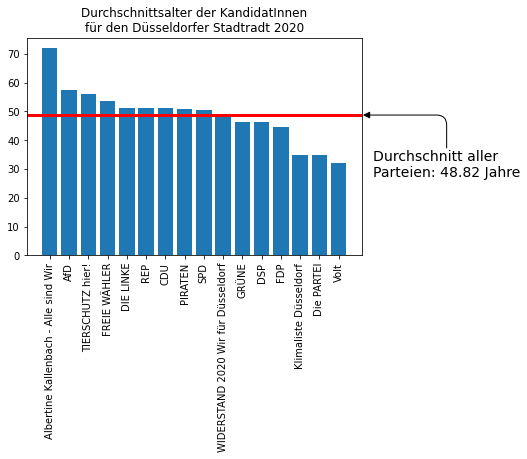

In [20]:
fig, ax = plt.subplots()

Durchschnitt = sorted_df['age'].mean()

ax.bar(sorted_df.index,sorted_df['age'] )
ax.axhline(sorted_df['age'].mean(), color='red', linewidth=3)
ax.annotate('Durchschnitt aller\nParteien: {:0.2f} Jahre'.format(Durchschnitt),xy=(16,0.645),xytext=(15,-50),
            xycoords=('data', 'axes fraction'), textcoords='offset points',
            horizontalalignment='left', verticalalignment='center', fontsize=14,
            arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=5,
                            connectionstyle='angle,angleA=90,angleB=0,rad=10'),
            )

ax.set_title("Durchschnittsalter der KandidatInnen\nfür den Düsseldorfer Stadtradt 2020")
plt.xticks(rotation='vertical')

plt.show()

## Geschlecht

Die von der Stadt Düsseldorf veröffentlichten Daten beinhalten kein Geschlecht.
Viele Berufsbezeichnungen sind zwar genderspezifisch, leider jedoch nicht alle. Eine Erkennung über Muster wäre daher nicht 100% möglich.
Eine andere Alternative ist du Prüfung der Vornamen gegen Dienste im Internet, welche das Geschlecht (sofern bestimmbar) zurückliefern. Auch hier stellte sich in der Praxis heraus, dass es Namen gibt die nicht zu bestimmen sind. Letztlich mussten 11 Kandidaten händisch bestimmt werden.

Trotz des genutzen Dienstes zur Geschlechtsbestimmung und manueller Kontrollen kann es zu falschen Angaben gekommen sein. Auch berücksichtigt die Auswertung dadurch nur Zuordnungen zum männlichen und weiblichen Geschlecht, jedoch kein nichtbinäres Geschlecht.

### Funktion zur Bestimmung des Geschlechts über den Internet-Dienst

Doppelnamen mit Leerzeichen oder Bindestrich, wurden vor der Prüfung in einzelen Namen unterteilt und nur der erste Name wurde geprüft.

In [21]:
# Gender function
import requests
import re   

def gender_check(name):
    name = re.split(" |-",name)
    response = requests.get("https://api.genderize.io?name=" + name[0] + "&country_id=DE")
    gender = response.json()['gender']
    return gender

In [22]:
# Bestimmung über die Berufsbezeichnung anhand von Mustern (nicht verwendet und ggf. nicht vollständig)

#df['gender'] = np.where(df[df['gender']]['Beruf'].str.contains('\win |in$|ngestellte([^r]|)|frau|kffr.|vorsitzende[^r]|schwester|eschäftigte([^r]|)'), "female", "M")

In [23]:
# Das Ergebnis der Funktion gender_check() wird in die Spalte "gender" eingetragen.
 
df['gender'] = df.apply(lambda x: gender_check(x['Vorname']),axis=1)	

In [ ]:
# Prüfung wo kein Geschlecht gesetzt wurde
df[df['gender'].isnull()]

In [25]:
# Manueller Eintrag des Geschlechts

df.at[107, 'gender'] = "male"
df.at[113, 'gender'] = "male"
df.at[181, 'gender'] = "male"
df.at[269, 'gender'] = "male"
df.at[302, 'gender'] = "male"
df.at[363, 'gender'] = "male"
df.at[422, 'gender'] = "female"
df.at[429, 'gender'] = "male"
df.at[538, 'gender'] = "female"
df.at[595, 'gender'] = "male"
df.at[702, 'gender'] = "male"

In [ ]:
# Ausgabe der beiden Spalten Vorname und gender.

df[['Vorname','gender']]

In [27]:
df['gender'].value_counts()

male      426
female    277
Name: gender, dtype: int64

### Gruppierung der Personen nach Partei und Geschlecht

In [28]:
#gender_df = df.groupby(["name_new", "gender"])['Name'].count()
df.groupby(["Partei_kurz", "gender"])['Name'].count()

Partei_kurz                           gender
AfD                                   female    10
                                      male      30
Albertine Kallenbach - Alle sind Wir  female     1
CDU                                   female    25
                                      male      52
DIE LINKE                             female    19
                                      male      25
DSP                                   female     9
                                      male      17
Die PARTEI                            female    11
                                      male      30
FDP                                   female    14
                                      male      36
FREIE WÄHLER                          female    21
                                      male      24
GRÜNE                                 female    32
                                      male      31
Klimaliste Düsseldorf                 female    23
                                     

In [29]:
# Prozent
gender_df = df.groupby(["Partei_kurz"])['gender'].value_counts(normalize=True)
gender_df


Partei_kurz                           gender
AfD                                   male      0.750000
                                      female    0.250000
Albertine Kallenbach - Alle sind Wir  female    1.000000
CDU                                   male      0.675325
                                      female    0.324675
DIE LINKE                             male      0.568182
                                      female    0.431818
DSP                                   male      0.653846
                                      female    0.346154
Die PARTEI                            male      0.731707
                                      female    0.268293
FDP                                   male      0.720000
                                      female    0.280000
FREIE WÄHLER                          male      0.533333
                                      female    0.466667
GRÜNE                                 female    0.507937
                                      male 

In [30]:
gender_df = gender_df.unstack('gender')

gender_df

gender,female,male
Partei_kurz,,
AfD,0.250000,0.750000
Albertine Kallenbach - Alle sind Wir,1.000000,NaN
CDU,0.324675,0.675325
DIE LINKE,0.431818,0.568182
DSP,0.346154,0.653846
Die PARTEI,0.268293,0.731707
FDP,0.280000,0.720000
FREIE WÄHLER,0.466667,0.533333
GRÜNE,0.507937,0.492063


In [31]:
gender_df.index

Index(['AfD', 'Albertine Kallenbach - Alle sind Wir', 'CDU', 'DIE LINKE',
       'DSP', 'Die PARTEI', 'FDP', 'FREIE WÄHLER', 'GRÜNE',
       'Klimaliste Düsseldorf', 'PIRATEN', 'REP', 'SPD', 'TIERSCHUTZ hier!',
       'Volt', 'WIDERSTAND 2020 Wir für Düsseldorf'],
      dtype='object', name='Partei_kurz')

In [32]:
gender_df = gender_df.sort_values('male')

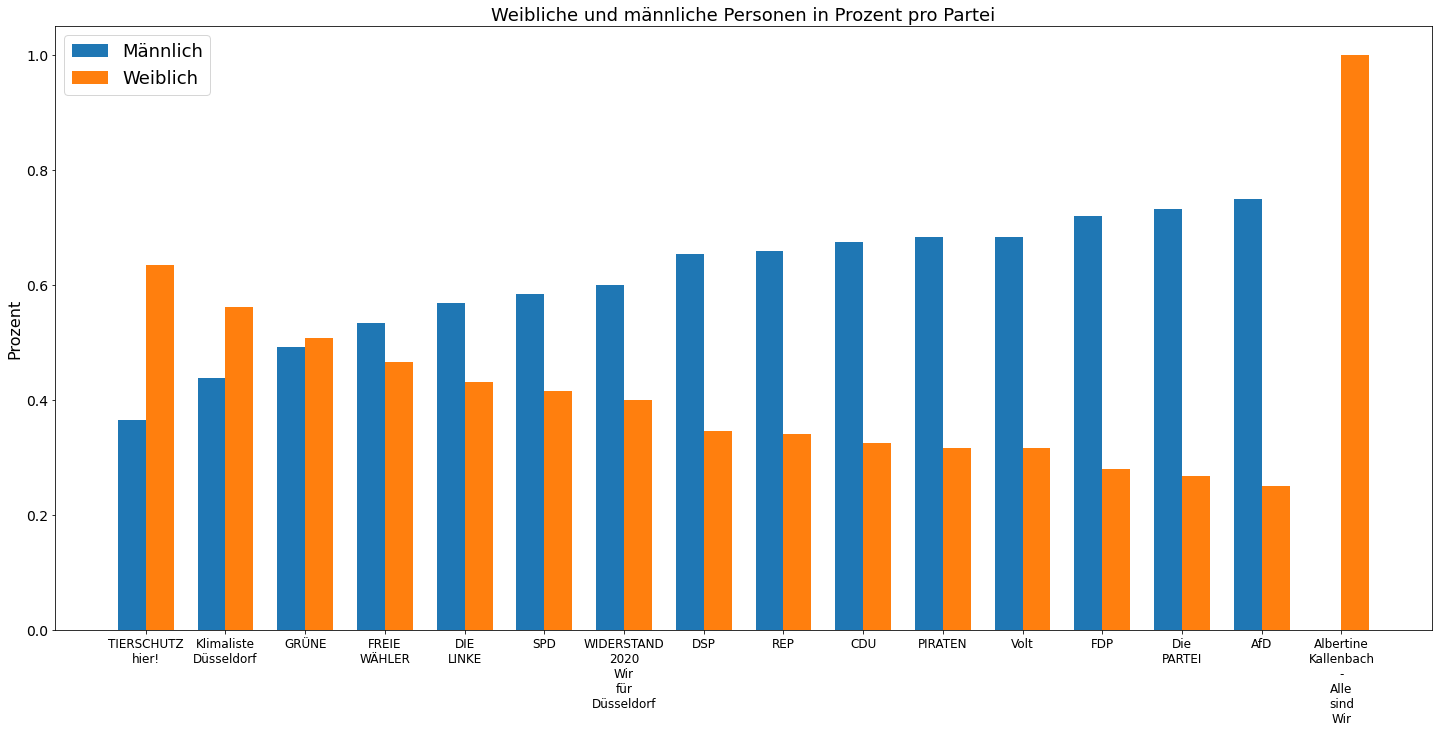

In [91]:
labels = gender_df.index
labels = [label.replace(' ', '\n') for label in labels]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(x - width/2, gender_df['male'], width, label='Männlich')
rects2 = ax.bar(x + width/2, gender_df['female'], width, label='Weiblich')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Prozent',fontdict={'size':16})
ax.set_title('Weibliche und männliche Personen in Prozent pro Partei',fontdict={'size':18})
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize=18)

fig.tight_layout()

plt.xticks(x, fontsize=12)
plt.yticks(fontsize=14)
plt.show()

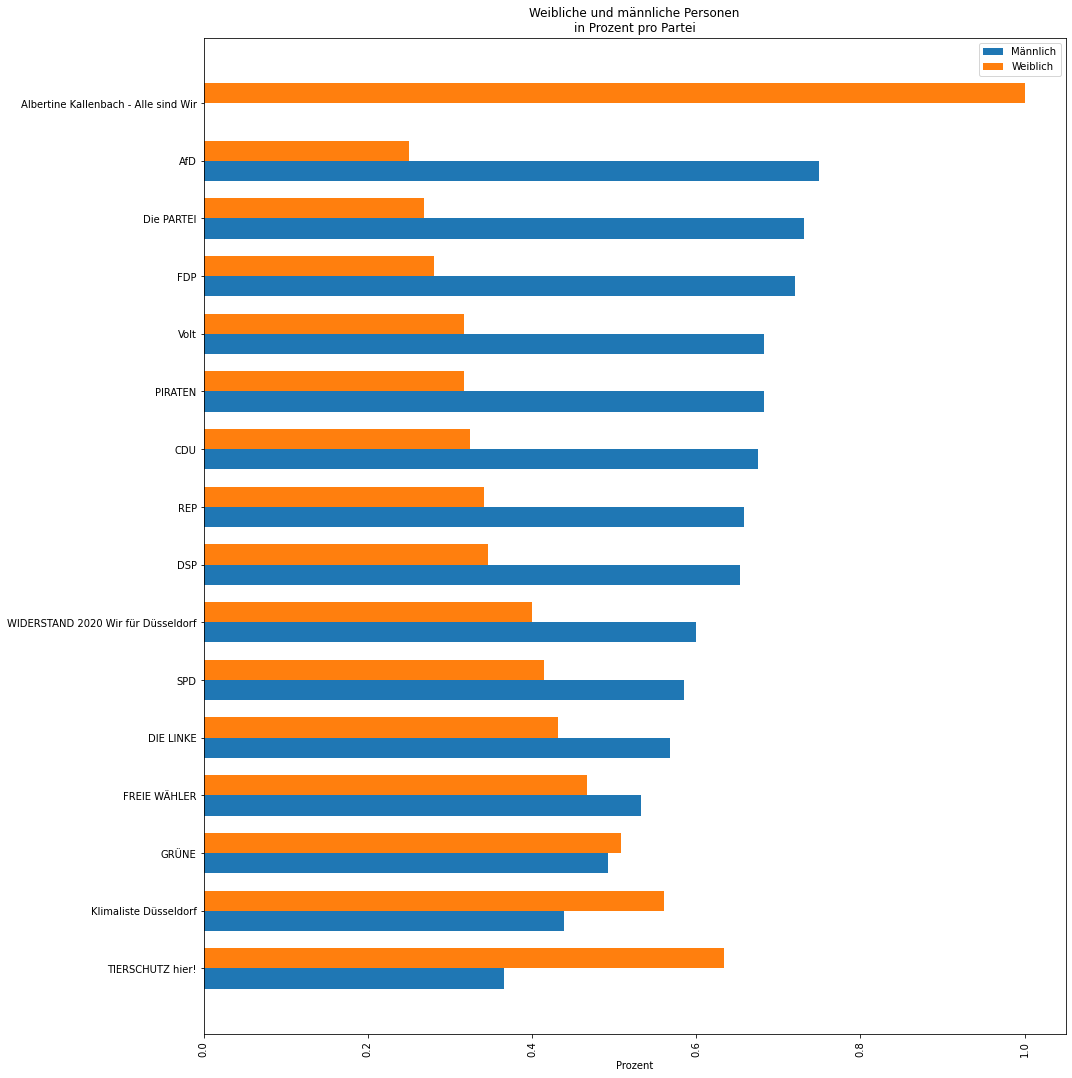

In [94]:
labels = gender_df.index

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15,15))
rects1 = ax.barh(x - width/2, gender_df['male'], width, label='Männlich')
rects2 = ax.barh(x + width/2, gender_df['female'], width, label='Weiblich')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Prozent')
ax.set_title('Weibliche und männliche Personen\nin Prozent pro Partei')
ax.set_yticks(x)
ax.set_yticklabels(labels)

ax.legend()

fig.tight_layout()

plt.xticks(rotation='vertical')
plt.show()

## Kandidantinnen und Kandidtaten mit Geburtsort Düsseldorf

In [35]:
df['D'] = df['Geburtsort'].apply(lambda x: 'True' if x == "Düsseldorf" else "False")

In [36]:
df.groupby('D')['Name'].count()

D
False    423
True     280
Name: Name, dtype: int64

In [37]:
d_df = df.groupby(['Partei_kurz'])['D'].value_counts(normalize=True)
df.groupby(['Partei'])['D'].count()

Partei
Aktion Partei für Tierschutz                                                                      41
Alternative für Deutschland                                                                       40
BÜNDNIS 90/DIE GRÜNEN                                                                             63
Christlich Demokratische Union Deutschlands                                                       77
DIE LINKE                                                                                         44
DIE REPUBLIKANER                                                                                  41
Deutsche Sportpartei                                                                              26
Einzelbewerberin#Albertine Kallenbach - Alle sind wir                                              1
Freie Demokratische Partei                                                                        50
Klimaliste Düsseldorf                                                               

In [38]:
d_df = d_df.unstack('D')
d_df = d_df.sort_values('False')
d_df

D,False,True
Partei_kurz,,
WIDERSTAND 2020 Wir für Düsseldorf,0.200000,0.800000
DSP,0.307692,0.692308
CDU,0.389610,0.610390
REP,0.463415,0.536585
FREIE WÄHLER,0.466667,0.533333
TIERSCHUTZ hier!,0.512195,0.487805
PIRATEN,0.609756,0.390244
FDP,0.620000,0.380000
DIE LINKE,0.636364,0.363636


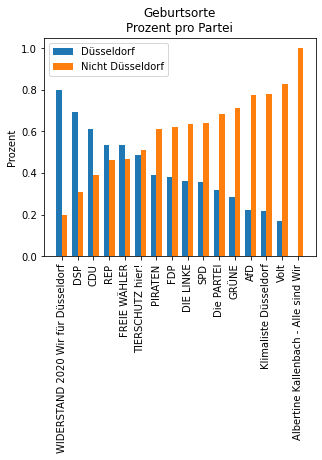

In [39]:
labels = d_df.index

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, d_df['True'], width, label='Düsseldorf')
rects2 = ax.bar(x + width/2, d_df['False'], width, label='Nicht Düsseldorf')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Prozent')
ax.set_title('Geburtsorte\nProzent pro Partei')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.xticks(rotation='vertical')
plt.show()